In [30]:
import pandas as pd
import matplotlib .pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
df=pd.read_csv("/content/ECGCvdata.csv")

In [35]:

df.head()

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


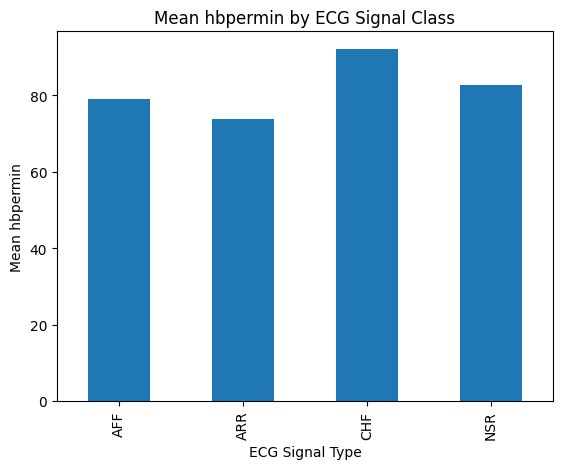

In [9]:
feature = 'hbpermin'
mean_feature = df.groupby('ECG_signal')[feature].mean()
plt.figure()
mean_feature.plot(kind='bar')
plt.xlabel('ECG Signal Type')
plt.ylabel(f'Mean {feature}')
plt.title(f'Mean {feature} by ECG Signal Class')
plt.show()

In [36]:
# Binning in Feature Engineering
bins = [0, 60, 100, 140, 300]
labels = ['Low', 'Normal', 'High', 'Very High']
df['HeartRate_Group'] = pd.cut(
    df['hbpermin'],
    bins=bins,
    labels=labels,
    right=False
)
print(df[['hbpermin', 'HeartRate_Group', 'ECG_signal']].head())
print(pd.crosstab(df['ECG_signal'], df['HeartRate_Group']))

    hbpermin HeartRate_Group ECG_signal
0  74.925669          Normal        ARR
1  68.503469          Normal        ARR
2  83.488603          Normal        ARR
3  68.503469          Normal        ARR
4  82.080000          Normal        ARR
HeartRate_Group  Low  Normal  High  Very High
ECG_signal                                   
AFF               48     202    42          8
ARR               67     208    23          2
CHF                0     186   114          0
NSR                7     249    44          0


In [24]:
#standard Data
X = df.drop(['ECG_signal', 'RECORD'], axis=1)
y = df['ECG_signal']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())


   hbpermin      Pseg     PQseg    QRSseg     QRseg     QTseg     RSseg  \
0 -0.360748  1.651560  1.548106  1.155387  1.093776  1.762090  1.216354   
1 -0.693224  1.225566  0.909131  1.319086  1.247886  1.778306  1.389567   
2  0.082553  1.084941  0.427908 -0.251419 -0.334276 -0.310224 -0.166596   
3 -0.693224  2.318767  1.511444  1.216327  1.188340  1.617844  1.242935   
4  0.009630  1.043285  1.233489  1.524078  1.427829  1.785970  1.619760   

      STseg      Tseg     PTseg  ...      SDSD     RMSSD   QRSarea   QRSperi  \
0  0.859838  1.229249  1.775238  ... -0.145021  0.827463  1.276148  1.584182   
1  0.469942 -0.600613  1.511219  ... -0.310552  1.061480  1.818869  1.750684   
2 -0.026608 -0.366156 -0.011909  ...  0.656074  0.657021  0.364681  0.213009   
3  0.385263 -0.639048  1.668571  ... -0.296096  1.012329  1.913770  1.648567   
4 -0.046018 -0.741611  1.655261  ...  0.168076  0.568468  1.570276  1.951905   

    PQslope   QRslope   RSslope   STslope      NN50     pNN50  
0  1

In [23]:
print(y.head())

0    ARR
1    ARR
2    ARR
3    ARR
4    ARR
Name: ECG_signal, dtype: object


In [28]:
#Implementation of PCA
V = SimpleImputer(strategy='mean')
X_imputed = V.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

         AFF       0.56      0.52      0.54        90
         ARR       0.98      0.92      0.95        90
         CHF       0.59      0.67      0.63        90
         NSR       1.00      1.00      1.00        90

    accuracy                           0.78       360
   macro avg       0.78      0.78      0.78       360
weighted avg       0.78      0.78      0.78       360



In [34]:
# Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [39]:
preprocessing_pipeline = Pipeline(pipeline.steps[:-1])
processed_data = preprocessing_pipeline.fit_transform(X)
cleaned_df = pd.DataFrame(processed_data)
cleaned_df.to_csv("Modified_ECG_file.csv", index=False)